In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [116]:
cases = pd.read_csv("corona/corona.csv")

In [136]:
world_population = pd.read_csv("corona/world_population.csv")

In [138]:
print(world_population.columns)
world_population.dtypes

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

In [139]:
print(cases.columns)
print(cases.dtypes)

Index(['Country', 'Cases', 'Deaths', 'Continent'], dtype='object')
Country      object
Cases         int64
Deaths        int64
Continent    object
dtype: object


In [140]:
world_population.loc[world_population["Country Code"] == "RUS", \
                     "Country Name"]="Russia"

In [141]:
world_population.loc[world_population["Country Code"] == "KOR", \
                     "Country Name"]="South Korea"

In [142]:
world_population.loc[world_population["Country Code"] == "HKG", \
                     "Country Name"]="Hong Kong"

In [143]:
m = pd.merge(cases, world_population[["Country Name","2018"]], how='left', left_on=['Country'], \
             right_on=['Country Name'])

In [144]:
m = m.rename(columns={"2018": "Population"})

In [145]:
m

,Country,Cases,Deaths,Continent,Country Name,Population
0,Japan,45,0,Asia,Japan,1.265291e+08
1,Singapore,28,0,Asia,Singapore,5.638676e+06
2,Thailand,25,0,Asia,Thailand,6.942852e+07
3,South Korea,23,0,Asia,South Korea,5.163526e+07
4,Hong Kong,22,1,Asia,Hong Kong,7.451000e+06
5,Australia,15,0,Australia/Oceania,Australia,2.499237e+07
6,Malaysia,14,0,Asia,Malaysia,3.152858e+07
7,Taiwan,13,0,Asia,Taiwan,2.378045e+07
8,United States,12,0,North America,United States,3.271674e+08
9,Germany,12,0,Europe,Germany,8.292792e+07


In [146]:
per_capita = pd.concat([m["Country"], m["Cases"]/m["Population"]], \
                       axis=1, keys=["Country", "Cases per capita"])

In [147]:
pcs = per_capita.sort_values("Cases per capita", ascending=True)

<BarContainer object of 19 artists>

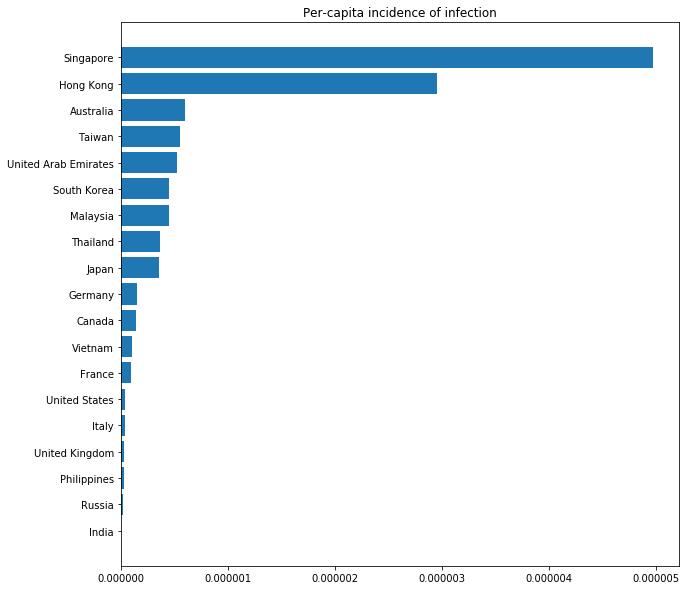

In [148]:
plt.figure(figsize=(10,10))
plt.title("Per-capita incidence of infection")
plt.barh(pcs["Country"], pcs["Cases per capita"])